 # Projet d'optimisation : Phase 1 et 2
 **Master 1 : ingéniérie des systéme intelligents**

**Asma DAGMOUNE : 3703457**

**Toufik FERHAT : 3872490**


## Phase 1 : Visualisation d'une Hyperquadrique






Une façon simple de visualiser une hyperquadrique de paramètres $\lambda$ est de tracer l'isovaleur de niveau 0 de la fonction $\psi(x, y, \lambda)=0$

Pour guider le tracé, il est utile de déterminer les droites englobantes. En effet, en tout point $(\mathrm{x}, \mathrm{y})$ du contour $\mathrm{HQ}$, la relation:
$$
\sum_{k=1}^{N h}\left|A_{k} \cdot x+B_{k} \cdot y+C_{k}\right|^{\gamma_{k}}=1
$$
implique que chacun des termes de la somme est inférieur à 1:
$$
\forall k \quad-1 \leq A_{k} \cdot x+B_{k} \cdot y+C_{k} \leq 1
$$
Chacune de ces condition définit une bande dans le plan $(x, y)$ :
$$
\begin{array}{ll}
\mathrm{Si} B_{k} \neq 0 & -\frac{A_{k}}{B_{k}} \cdot x-\frac{c_{k}}{B_{k}}-\frac{1}{B_{k}} \leq y \leq-\frac{A_{k}}{B_{k}} \cdot x-\frac{C_{k}}{B_{k}}+\frac{1}{B_{k}} \\
\mathrm{Si} B_{k}=0 & -\frac{c_{k}}{A_{k}}-\frac{1}{A_{k}} \leq x \leq-\frac{c_{k}}{A_{k}}+\frac{1}{A_{k}}
\end{array}
$$

On commence tout d'abords par définir la fonction qui retourne les valeurs d'une hyperquadrique pour des paramétres $\lambda$ données. 

In [1]:
#importation des modules nécessaires
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
def HQ(x,y,lambdas,Nh):
    """
    Fonction qui renvoie les valeurs d'une hyperquadrique avec un nombre de terme donné

    x : vecteur des abscisses
    y : vecteur des ordonnées
    Lambdas : Matrice des paramètres de l'hyperquadrique
    Nh : degré de l'hyperquadrique

    """
    phi = 0
    for i in range(0,Nh):
        phi+= abs(lambdas[i][0]*x + lambdas[i][1]*y + lambdas[i][2])**lambdas[i][3]

    return phi - 1

In [3]:
def droite_englobante(x,y,lambdas, Nh):
    """
    Fonction qui renvoie une liste des droites englobantes d'une Hyperquadrique 
    Chaque élement de la liste est une sous liste avec deux éléments. 
    Le premier élément est la liste des valeurs de la droite 
    le deuxiéme élément determinant si b == 0
    
    """
    droites = []
    for i in range(0 ,Nh):
        if lambdas[i][1] == 0 :
            droites.append([[-lambdas[i][2]/lambdas[i][0] + 1 / lambdas[i][0]]*len(x), 0])
            droites.append([[-lambdas[i][2]/lambdas[i][0] - 1 / lambdas[i][0]]*len(x), 0])
        else :
            droites.append([-lambdas[i][0]/lambdas[i][1]*x + lambdas[i][2]/lambdas[i][1] + 1 /lambdas[i][1], 1])
            droites.append([-lambdas[i][0]/lambdas[i][1]*x + lambdas[i][2]/lambdas[i][1] - 1 /lambdas[i][1], 1])
        
    
    return droites



On définit la matrice Lambdas qui contient tout les parémétres de l'HQ, Lambdas = [[A1, B1, C1, $\gamma_{1}$],[A2, B2, C2, $\gamma_{2}$].....[ANh, BNh, CNh, $\gamma_{Nh}$]]

In [4]:
def HQ_trace(lambdas,Nh,x_min,x_max, y_min,y_max,n):

    """
    Fonction qui permet de tracer l'HQ et les droites envolopantes 

    """



    x1d = np.linspace(x_min,x_max,n)
    y1d = np.linspace(y_min,y_max,n)

    x2d, y2d = np.meshgrid(x1d, y1d)

    droites = droite_englobante(x1d,y1d,lambdas, Nh)
    
    print("Hyper-quadrique avec {} termes".format(Nh))
    i = 1
    for l in lambdas :
    
        print("{}. a, b ,c = {} / {} / {} - gamma = {}".format(i, l[0],l[1],l[2],l[3]))
        i +=1

    plt.contour(x2d,y2d,HQ(x2d,y2d, lambdas, Nh),[0])

    for d in droites :
        if d[1] == 0 :
            plt.plot(d[0], x1d)
        else :
            plt.plot(x1d, d[0])

    plt.title('Isovaleurs de HQ')
    plt.xlabel('Valeurs de x')
    plt.ylabel('Valeurs de y')
    plt.grid()
    plt.axis([x_min, x_max, y_min, y_max]);

Le but de cette partie est d'analyser l'effet des paramétres :

On commence par une HQ à 2 termes pour simplifier et on essaie de créer des jeux de paramétres 

Ici on prends un cas particulier avec $\psi(x, y, \lambda)$ = $x^2 + y^2$

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / 0 / 0 - gamma = 2
2. a, b ,c = 0 / 1 / 0 - gamma = 2


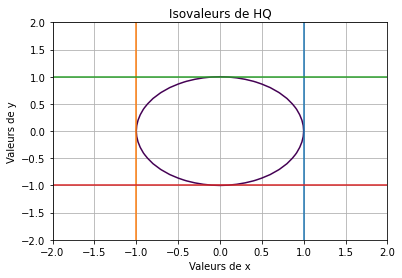

In [5]:
lambdas = [[1,0,0, 2], [0,1,0 ,2]]
HQ_trace(lambdas, 2, -2,2,-2,2, 41)

Ici on prends un cas particulier avec $\psi(x, y, \lambda)$ = $(x + 1)^2 + y^2$ 

Ci-dessous on remarque en mettant c1 à 1 il y a un décalage vers la gauche et quand on met la valeur de c1 à - 1 il y a une décallage vers la droite. 

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / 0 / 1 - gamma = 2
2. a, b ,c = 0 / 1 / 0 - gamma = 2


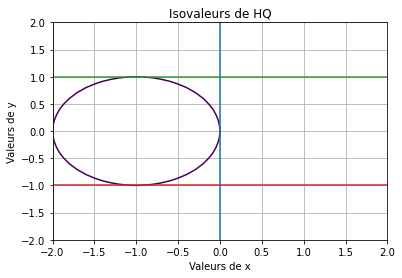

In [6]:
lambdas = [[1,0,1, 2], [0,1,0 ,2]]
HQ_trace(lambdas, 2, -2,2,-2,2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / 0 / -1 - gamma = 2
2. a, b ,c = 0 / 1 / 0 - gamma = 2


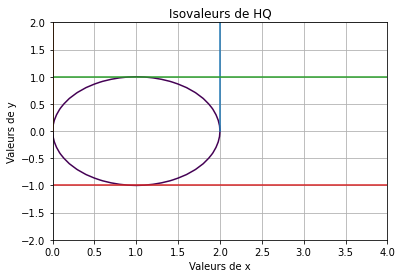

In [7]:
lambdas = [[1,0,-1, 2], [0,1,0 ,2]]
HQ_trace(lambdas, 2, 0,4,-2, 2, 41)

Comme pour c1 , La valeur de c1définis un décalage sur y 




 0 < $\gamma$ < 1 : l'hyperquadrique a une forme d'étoile 

 1 < $\gamma$ < 1.8 : l'hyperquadrique a une forme d'un losange légèrement arrondiau bords

 2 < $\gamma$ < 3 : l'hyperquadrique a une forme ovale

 3 < $\gamma$ : l'hyperquadrique prend une forme rectangulaire

 on constate que la valeur de $\gamma$ a une influence sur la longueur de l'hyperquadrique et modifie les bords . 

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / 0 / 0 - gamma = 5
2. a, b ,c = 0 / 1 / 0 - gamma = 5


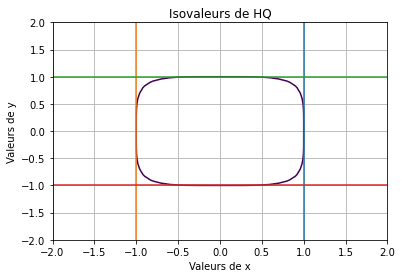

In [8]:
lambdas = [[1,0,0, 5], [0,1,0 ,5]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / 0 / 0 - gamma = 2
2. a, b ,c = 0 / 1 / 0 - gamma = 5


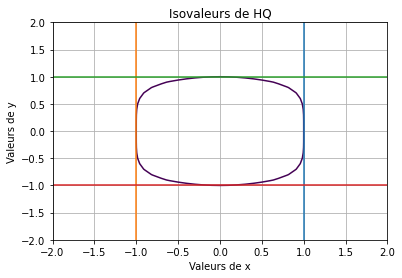

In [9]:
lambdas = [[1,0,0, 2], [0,1,0 ,5]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / 0 / 0 - gamma = 0.2
2. a, b ,c = 0 / 1 / 0 - gamma = 2


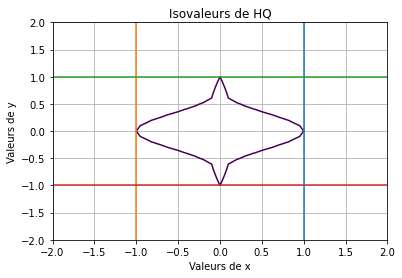

In [10]:
lambdas = [[1,0,0, 0.2], [0,1,0, 2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / 0 / 0 - gamma = 0.2
2. a, b ,c = 0 / 1 / 0 - gamma = 0.2


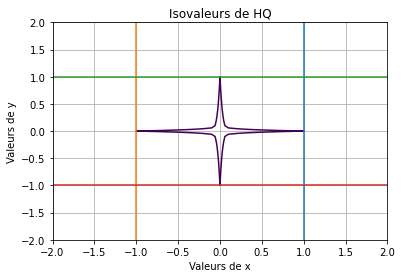

In [11]:
lambdas = [[1,0,0, 0.2], [0,1,0 , 0.2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = -1 / 0 / 0 - gamma = 0.2
2. a, b ,c = 0 / 1 / 0 - gamma = 0.2


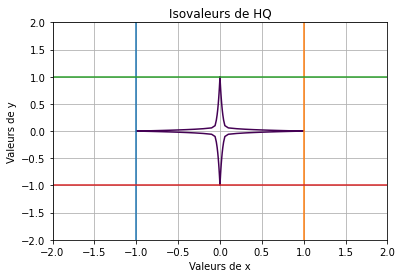

In [12]:
lambdas = [[-1,0,0, 0.2], [0,1,0 , 0.2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

0 < 
γ
 < 1 : l'hyperquadrique a une forme d'étoile

1 < 
γ
 < 1.8 : l'hyperquadrique a une forme d'un losange légèrement arrondiau bords

2 < 
γ
 < 3 : l'hyperquadrique a une forme ovale

3 < 
γ
 : l'hyperquadrique prend une forme rectangulaire

on constate que la valeur de 
γ
 a une influence sur la longueur de l'hyperquadrique et modifie les bords .

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / 100 / 0 - gamma = 2
2. a, b ,c = 0 / 1 / 0 - gamma = 2


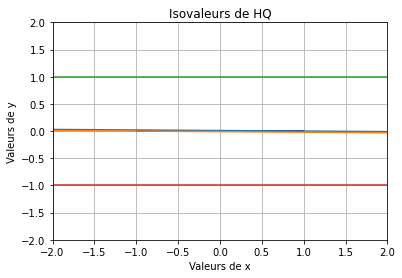

In [13]:
lambdas = [[1, 100, 0, 2], [0, 1, 0, 2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / 100 / 0 - gamma = 2
2. a, b ,c = 0 / 100 / 0 - gamma = 2


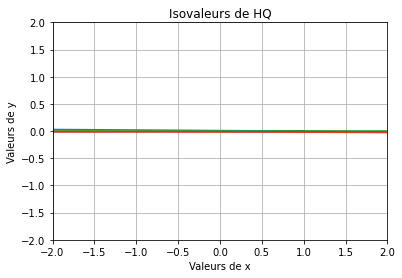

In [14]:
lambdas = [[1, 100, 0, 2], [0, 100, 0, 2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / -5 / 0 - gamma = 2
2. a, b ,c = 0 / 1 / 0 - gamma = 2


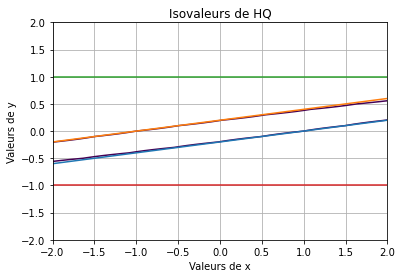

In [15]:
lambdas = [[1, -5, 0, 2], [0, 1, 0, 2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / -100 / 0 - gamma = 2
2. a, b ,c = 0 / 1 / 0 - gamma = 2


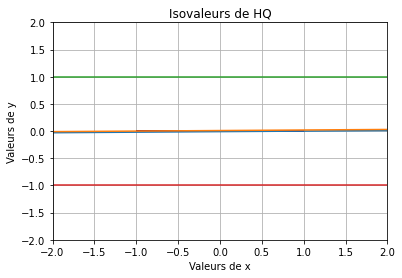

In [16]:
lambdas = [[1, -100, 0, 2], [0, 1, 0, 2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = 1 / -5 / 0 - gamma = 2
2. a, b ,c = 0 / -6 / 0 - gamma = 2


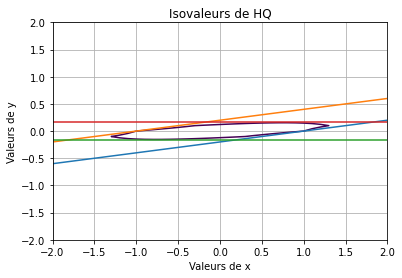

In [17]:
lambdas = [[1, -5, 0, 2], [0, -6, 0, 2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

B > 0:  a une influence sur les droites enveloppantes

     x : On remarque qu'elles sont de frome ax+b avec un coefficient  directeur négatif qui tend vers zéro en augmentant la valeur de B
     y: On constate que dès lors que la valeur de que la valeur de B2 change , l'écart entre les deux droites y1 et y2 est modifié.En effet les deux droites se rapprochent en augmenant la valeur de B , ensuite elles valent toute sles deux 0 et se supperposent quand B est choisi très grand

B < 0:  a une influence sur les droites enveloppantes

     x:  On remarque qu'elles sont de frome ax+b avec un coefficient  directeur positif et qui tends vers 0 lorsque B est grand .
     y: On constate que dès lors que la valeur de que la valeur de B2 change , l'écart entre les deux droites y1 et y2 est modifié.En effet les deux droites se rapprochent en augmenant la valeur de B , ensuite elles valent toute sles deux 0 et se supperposent quand B est choisi très grand

Hyper-quadrique avec 2 termes
1. a, b ,c = 100 / 0 / 0 - gamma = 2
2. a, b ,c = 0 / 1 / 0 - gamma = 2


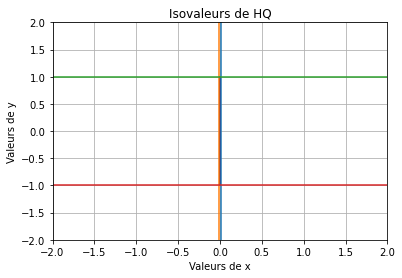

In [18]:
lambdas = [[100, 0, 0, 2], [0, 1, 0, 2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

La valeur de A a une influence sur l'écart entre les deux droites englobantes X qui finissent par se superposer et qui valent chacunes x=0

Hyper-quadrique avec 2 termes
1. a, b ,c = 2 / 0 / 0 - gamma = 2
2. a, b ,c = 5 / 1 / 0 - gamma = 2


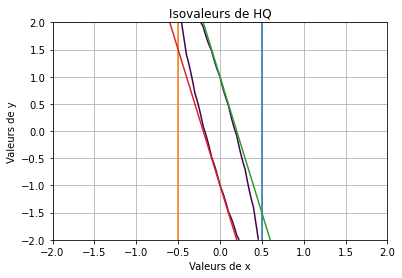

In [19]:
lambdas = [[2, 0, 0, 2], [5, 1, 0, 2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

Hyper-quadrique avec 2 termes
1. a, b ,c = -2 / 0 / 0 - gamma = 2
2. a, b ,c = -1 / 1 / 0 - gamma = 2


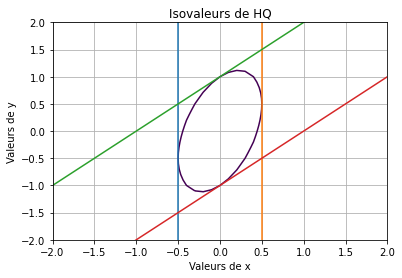

In [20]:
lambdas = [[-2, 0, 0, 2], [-1, 1, 0, 2]]
HQ_trace(lambdas, 2, -2,2,-2, 2, 41)

A > 0 :
Les droites englobantes horizontales ( Y ) sont de formes ax+b de coefficient directeur négatif 
A < 0 :
Les droites englobantes horizontales ( Y ) sont de formes ax+b de coefficient directeur positif 

## Phase 2 : Fitter un nuage de point par une HQ
Dans le cas générale, fitter un nuage de point par une Hyperquadrique revient à trouver tout les paramétres de l'HQ de sorte que la plus part des points du nuage soit le plus proche possible de l'HQ. 

Dans notre cas particulier, le probléme est simplifié. L’HQ est définie par l’équation ci-dessous, dans laquelle il n’y a que deux paramètres inconnu : 𝑎 et 𝑏.

$$
\begin{array}{c}
\psi(x, y, a, b)=0 \\
\text { avec } \quad \psi(x, y, a, b)=(a x+b y)^{4}+(x+y)^{4}-1
\end{array}
$$

Les données à fitter sont un ensemble de points $\left\{\left(x_{i}, y_{i}\right)\right\}_{i=1, N}$ données par le fichier ***Data_HQ_Ph1et2***.

Le but du problème est de trouver le jeu de coefficients $a$ et $b$ tels que I'hyperquadrique passe au mieux par le nuage de points. Pour cela, il faut définir un critère de distance entre un point $\left(x_{i}, y_{i}\right)$ et l'hyperquadrique $\mathrm{HQ}$ dont on déduit un critère de distance entre l'ensemble des points et $\mathrm{HQ}$. On propose de travailler avec le critère quadratique ci-dessous.
$$
J(a, b)=\sum_{i=1}^{N}\left[\psi\left(x_{i}, y_{i}, a, b\right)\right]^{2}
$$

### 1. Méthode du gradient
Une premiére solution pour trouver la paire (a,b) qui minimise au mieux $J(a,b)$ est la méthode du gradient.

Elle conciste à tronquer une valeur de déplacement $dX$ de $X = (a,b)$  tant que $dX$ est supérieur à une certainte valeur de présision $\epsilon$ avec 
$d X = \alpha .\left\|\nabla J\left(X_{n-1}\right)\right\|$

Pour pourvoir implémenter l'algorithme du gradient il nous faut calculer le gradient du critére quadratique  : $
J(a, b)=\sum_{i=1}^{N}\left[\psi\left(x_{i}, y_{i}, a, b\right)\right]^{2}
$

On sait que: $$\nabla J\left(a,b\right)= \left[\begin{array}{l}\frac{\partial J}{\partial a}(a, b) \\ \frac{\partial J}{\partial b}(a, b)\end{array}\right]$$ 

La dérivation est linéaire, donc la dérivé d'une somme est la somme des dérivées : $\frac{\partial }{\partial a}(\sum_{i=1}^{N}\frac{\partial }{\partial a}\left[\psi\left(x_{i}, y_{i}, a, b\right)\right]^{2}) = \sum_{i=1}^{N} \frac{\partial }{\partial a}\left[\psi\left(x_{i}, y_{i}, a, b\right)\right]^{2} $


donc $  \frac{\partial }{\partial a}J(a,b) = \sum_{i=1}^{N} 2\left[\psi\left(x_{i}, y_{i}, a, b\right)\right]\frac{\partial }{\partial a}\left[\psi\left(x_{i}, y_{i}, a, b\right)\right]$.

Finalement on obtient :

$\frac{\partial J}{\partial a}(a, b) = \sum_{i=1}^{N} 8x(a x+b y)^{3}\left(-1+(x+y)^{4}+(a x+b y)^{4}\right)$

En appliquant la meme méthode pour la dérivée partiel oar rapport à $b$ on obtient :

$\frac{\partial J}{\partial b}(a, b) = \sum_{i=1}^{N} 8y(a x+b y)^{3}\left(-1+(x+y)^{4}+(a x+b y)^{4}\right)$

$\alpha$  est un coéficient d'apprentissage qu'on réglera par essaie. 

Pour implémenter l'algorithme en code Python, il faut tout d'abords importer les modules dont on aura besoin. Notamment Numpy pour les calculs matriciel et Matplotlib pour les graphiques.

In [21]:
#importation des modules nécessaires
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

On a besoin aussi de définir les fonctions $\psi$, $J$ et $\nabla J$ :  

In [22]:
def phi(x, y, a, b):
    """
    
    Hyperquadrique d'ordre deux avec a,b comme seuls paramétres inconnu en entrées
    Parameters
    ----------
    x : float
        l'abcisse
    y : float
        l'ordonnee
    a : float
        paramétre de l'HQ.
    b : TYPE
        paramétre de l'HQ

    Returns
    -------
    float
        valeur de l'hyperquadrique pour les paramétres en entreés'

    """
    return (a*x+b*y)**4 + (x+y)**4 - 1

In [23]:
def J(x, y, a, b, n):
    """
    Fonction qui retourne la valeur du critére selon un a et b données 

    Parameters
    ----------
    x : ndarray
        Vecteur des abcisses du nuage de points.
    y : ndarray
        Vecteur des ordonnes du nuage de points
    a : float
        paramétre de l'HQ
    b : float
        paramétre de l'HQ'
    n : int
        Nombre de points du nuage

    Returns
    -------
    somme : float
        Valeur du critére quadratique

    """
    somme = 0 
    for i in range(0,n):
        somme = somme + (phi(x[i],y[i],a ,b))**2

    return somme 

In [24]:
def delta_J(x,y,a,b):
    """
    Fonction qui retourne le gradient du critére J sous forme de vecteur.

    Parameters
    ----------
     x : ndarray
        Vecteur des abcisses du nuage de points.
    y : ndarray
        Vecteur des ordonnes du nuage de points
    a : float
        paramétre de l'HQ
    b : float
        paramétre de l'HQ'

    Returns
    -------
    ndarray
        Vecteur ligne contenant les deux dérivées partiel par rapport a et b.

    """
    #valeur de la dérivée par rapport a a
    somme1 = 0
    #valeur de la dérivée par rapport a b
    somme2 = 0
    
    for i in range(0,23):
        somme1 += phi(x[i],y[i],a ,b)*8*x[i]*(a*x[i] + b*y[i])**3
        somme2 += phi(x[i],y[i],a ,b)*8*y[i]*(a*x[i] + b*y[i])**3
    
    return np.array([somme1, somme2])

Les points du nuage sont contenu dans le fichier ***Data_HQ_Ph1et2***. Chaque ligne du fichier représente une cordonnée. La premiére étant les $x$ et la deuxiéme les $y$. Chaque point est délimité par une virgule. On récupére les valeurs des points sous forme de matrice à l'aide du code ci-dessous :

In [25]:
data = np.genfromtxt('Data_HQ_Ph1et2.csv', delimiter=',')

Pour que les notations soit plus explicite on stock les abscisse dans vecteur *x* et  les ordonées dans un vecteur *y* :

In [26]:
x = data[0]
y = data[1]

Maintenant, il ne reste qu'à initialiser les variables de l'algorithme : 
- **n** : Le nombre d'itérations
- **n_max** : le nombre maximale d'itérations 
- **epsilon** : la précision sur la position du minimum
- **alpha** : pas de recherche ou coiéfficiant d'apprentissage
- **X0** : la paire (a,b) de départ de l'algorithme et aussi la paire de la fin
- **dX** : Longeur de déplacement d'une itération
- **converge** : indicateur booléen de convergence
- **points** : Liste contenant toutes les paires de points du début à la fin de l'algorithme

In [27]:
n = 0
n_max = 10000
epsilon = 10**-6
converge = True
alpha = 0.002
X0 = np.array([-0.2,0.4])
dX = 1
points = [X0]

L'algorithme est le suivant : 

Tant que $dX > \epsilon$ et $n < nmax$ :
* $X_{n} \leftarrow X_{n-1} - \alpha \nabla J(X_{n-1})$
* $dX \leftarrow \alpha \sqrt{\frac{\partial J}{\partial a}(a, b)^2 + \frac{\partial J}{\partial b}(a, b)^2}$
* $n \leftarrow n + 1$
* $points.ajouter(X_{n})$
  
$converge \leftarrow (dX <=  \epsilon)$

L'implémentation sous Python est ci-dessous :

In [28]:
while dX > epsilon and n < n_max :
    d = delta_J(x,y,X0[0],X0[1])
    X0 = X0 - alpha*d
    dX = alpha*sqrt(d[0]**2+d[1]**2)
    n+=1
    points.append(X0)
converge = (dX <= epsilon)

A la sortie de la boucle si l'algorithme a convergé, le minimum du critére quadratique est dans la variable $X0$. 

Maintenant il suffit de d'afficher à l'aide d'un meme graphe le nuage de point et l'hyperquadrique. 

Hyper-quadrique avec 2 termes :
1. a, b, c = -0.8034507889922108/ 0.37372118901875456/ 0.000 - gamma = 4.000
2. a, b, c = 1.000 / 1.000/ 0.000 - gamme = 4.000
Le minimum a était eteint sous 166 itérations


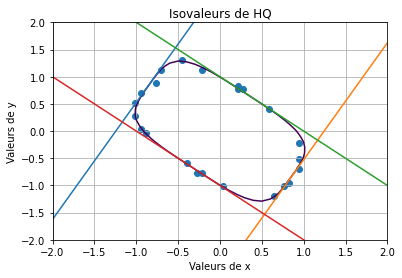

In [29]:

xmin, xmax, nx = -2, 2, 41
ymin, ymax, ny = -2, 2, 41

x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)

x2d , y2d = np.meshgrid(x1d, y1d)
a = np.linspace(-1,1,1001)
b = np.linspace(-1,1,1001)

a2d, b2d = np.meshgrid(a, b)

a_min = X0[0]
b_min = X0[1]

points = np.array(points)

droite1 = - a_min/b_min*x1d + 1/b_min
droite2 = - a_min/b_min*x1d - 1/b_min
droite3 =  - x1d + 1 
droite4 =  - x1d - 1

print("Hyper-quadrique avec 2 termes :")
print("1. a, b, c = {}/ {}/ 0.000 - gamma = 4.000".format(a_min, b_min))
print("2. a, b, c = 1.000 / 1.000/ 0.000 - gamme = 4.000")
print("Le minimum a était eteint sous {} itérations".format(n))

plt.contour(x2d,y2d,phi(x2d,y2d,a_min,b_min),[0])

plt.scatter(data[0],data[1])

plt.plot(x1d, droite1)
plt.plot(x1d, droite2)
plt.plot(x1d, droite3)
plt.plot(x1d, droite4)

plt.title('Isovaleurs de HQ')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis([-2, 2, -2, 2]);

On remarque sur le graphe ci-dessus que l'hyperquadrique représenté à l'aide de la solution trouvé est en accord avec le nuage de point. En effet, la plupart des points du nuage se trouve bien sur l'HQ ou trés prés de l'HQ ce qui laisse à penser que c'est une solution correcte et satisfaisante. 

**Remarque :**  
- L'algorithme a divergé trés rapidement pour plusieurs valeurs de $\alpha$ qui était assez faible mais il a fini par converger avec un $\alpha = 0.002$
- Le nombre d'itération pour trouver le solution dépends de $\alpha$, plus $\alpha$ est grand plus le nombre d'itération est petit mais si il est grand il y a rique de divergence. 

On peut aussi visualiser les isovaleurs de $J(a,b)$ et les points successifs trouvés par l'algorithme pour confirmer que l'algorithme converge bien sur la bonne solution :

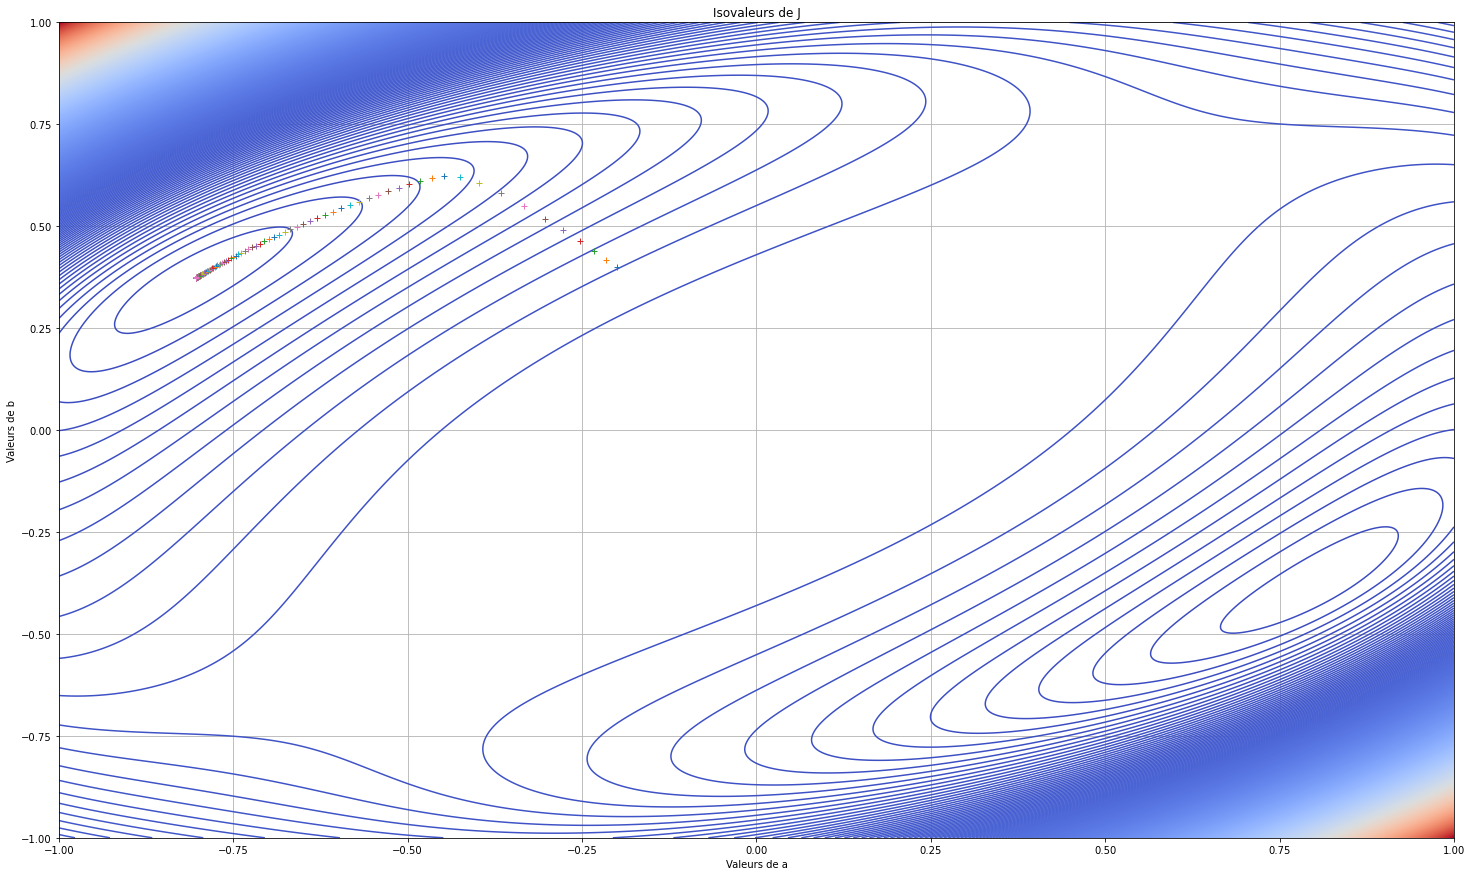

In [30]:
plt.figure(figsize=(25, 15))
plt.contour(a2d,b2d,J(x,y,a2d,b2d,23),levels = 1001,cmap='coolwarm')
for p in points:
    plt.plot(p[0],p[1],'-+')
    
plt.title('Isovaleurs de J')
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.axis([-1, 1, -1, 1])

Selon le graphe des isovaleurs de $J$ on peut conclure qu'il exite deux minimum. On remarque que les points trouvés par l'algorithme converge bien vers un des minimums.

**Remarque :**
- L'éfficacité de l'algorithme dépends beaucoup du point de départ. En effet, si le point de départ se situe dans la zone prés du point (0,0) où le gradient est presque nul l'algorthme rique de ne pas fonctionner
- Le minimum trouvé dépends du point de départ
- Les points sont tous perponduculaire au isovaleurs les plus proches. C'est du à la direction du gradient. 

### 2. Méthode de Newton :
Quand la fonction à minimiser est localement convexe, il est avantageux d'utiliser la méthode de Newton pour trouver le minimum beaucoup plus rapidement. 

**Principe de la méthode de Newton :**

On souhaite trouver le minimum de la fonction $J$, supposée convexe sur $\mathbb{R}$, ou au moins dans le voisinage étudié. $0 \mathrm{n}$ suppose que l'on dispose du gradient $\nabla J$ et on doit calculez la matrice hessienne $HJ .$

Soit $X_{n-1}$, une solution approchée. La fonction est approximée par $\tilde{J}_{n-1}$ son développement limité d'ordre 2 en $X_{n-1}$ :
$$
J_{n-1}(X)=\tilde{J}_{n-1}\left(X_{n-1}\right)+\nabla J_{n-1}\left(X_{n-1}\right)\left(X-X_{n}\right)+\frac{1}{2}\left(X-X_{n-1}\right)^{T} \cdot H J_{n-1}\left(X_{n-1}\right) \cdot\left(X-X_{n}\right)
$$
La nouvelle solution approchée $X_{n}$ est le minimum de $J_{n-1}$, obtenu en annulant le gradient de $J_{n-1}$.
$$
\begin{array}{l}
\nabla J_{n-1}=\nabla J_{n-1}\left(X_{n-1}\right)+H J_{n-1}\left(X_{n-1}\right)\left(X-X_{n}\right) \\
\nabla J_{n-1}=0 \Leftrightarrow \nabla J_{n-1}\left(X_{n-1}\right)+H J_{n-1}\left(X_{n-1}\right)\left(X-X_{n}\right)=0
\end{array}
$$
d'où $: X_{n}=X_{n-1}+\Delta X,$ où $\Delta X$ est solution du système linéaire $: H J_{n-1}\left(X_{n-1}\right) . \Delta X=-\nabla J_{n-1}\left(X_{n-1}\right)$

Pour calculer la matrice hessienne de J on se sert des calculs du gradient qu'on déja effectué dans la premiére méthode. 

On sait que la matrice hessienne est de la forme :  $H_{J}(a, b)=\left[\begin{array}{ll}\frac{\partial^{2} J}{\partial a^{2}}(a, b) & \frac{\partial^{2} J}{\partial a \partial b}(a, b) \\ \frac{\partial^{2} J}{\partial b \partial a}(a, b) & \frac{\partial^{2} J}{\partial b^{2}}(a, b)\end{array}\right]$

On sait déja que $\frac{\partial J}{\partial a}(a, b) = \sum_{i=1}^{N} 8x(a x+b y)^{3}\left(-1+(x+y)^{4}+(a x+b y)^{4}\right)$ et que $\frac{\partial^{2} J}{\partial a^{2}}(a, b) = \frac{\partial }{\partial a}(\frac{\partial J }{\partial a}(a, b)) $

Comme pour toute à l'heure, la dérivée d'une somme est la somme des dérivées. De plus la dérivée d'un produit de fonctions est directement obtenu par la formule : $p =uv \implies p' = u'v + uv'$.

C'est à dire on peut simplifier  $\frac{\partial^2 J }{\partial a^{2}}(a, b)$ en $ \sum_{i=1}^{N} \frac{\partial }{\partial a}(8x(a x+b y)^{3})(-1+(x+y)^{4}+(a x+b y)^{4} + 8x(a x+b y)^{3} \frac{\partial }{\partial a}(-1+(x+y)^{4}+(a x+b y)^{4})$

Finalement on a : 

$\frac{\partial^2 J }{\partial a^{2}}(a, b) =  \sum_{i=1}^{N} 32 x^{2}(a x+b y)^{6}+24 x^{2}(a x+b y)^{2}\left(-1+(x+y)^{4}+(a x+b y)^{4}\right)$

On faisant le meme calcul pour $\frac{\partial^2 J }{\partial b^{2}}(a, b)$, $\frac{\partial^2 J }{\partial b \partial a}(a, b)$ et $\frac{\partial^2 J }{\partial a \partial b}(a, b)$ on a : 

$\frac{\partial^2 J }{\partial b^{2}}(a, b) = \sum_{i=1}^{N} 32 y^{2}(a x+b y)^{6}+24 y^{2}(a x+b y)^{2}\left(-1+(x+y)^{4}+(a x+b y)^{4}\right) $

$\frac{\partial^2 J }{\partial b \partial a}(a, b) = \frac{\partial^2 J }{\partial a \partial b}(a, b) = \sum_{i=1}^{N}  32 xy(a x+b y)^{6}+24 yx(a x+b y)^{2}\left(-1+(x+y)^{4}+(a x+b y)^{4}\right)$

Maintenant qu'on a calculé la matrice hessienne, on peut implémenter une fonction sous python qui permet de la calculer :

In [31]:
def hessienne(x,y, a ,b ):
    """
    Fonction qui retourne la matrice hessienne du critére quadratique J

    Parameters
    ----------
    x : ndarray
        Vecteur des abcisses du nuage de points.
    y : ndarray
        Vecteur des ordonnes du nuage de points
    a : float
        paramétre de l'HQ
    b : float
        paramétre de l'HQ'

    Returns
    -------
    ndarray
        Matrice hessienne

    """
    delta_a_a = 0
    delta_a_b = 0 
    delta_b_b = 0
    
    for i in range(0,23):
        delta_a_a += 32*((a*x[i] + b*y[i])**6)*((x[i])**2) + 24*((x[i])**2)*((a*x[i] + b*y[i])**2)*phi(x[i],y[i],a,b)
        delta_a_b += 32*((a*x[i] + b*y[i])**6)*(x[i])*(y[i]) + 24*((x[i])*y[i])*((a*x[i] + b*y[i])**2)*phi(x[i],y[i],a,b)
        delta_b_b += 32*((a*x[i] + b*y[i])**6)*((y[i])**2) + 24*((y[i])**2)*((a*x[i] + b*y[i])**2)*phi(x[i],y[i],a,b)
    
    return np.array([[delta_a_a, delta_a_b],[delta_a_b, delta_b_b]])

L'algorithme de la méthode Newton est comme suit : 

Tant que dX > $\epsilon$ et $n < n_{max}$ :
- Calculer $\nabla J_{n-1}\left(X_{n-1}\right)$
- Calculer $H J_{n-1}\left(X_{n-1}\right)$
- $\Delta X \leftarrow$ solution du système $H J_{n-1}\left(X_{n-1}\right) \cdot \Delta X=-\nabla J_{n-1}\left(X_{n-1}\right)$
- $X_{n} \leftarrow X_{n-1}+\Delta X$
- $d X \leftarrow\|\Delta X\|$
- $n \leftarrow n+1$
- $Point.ajouter(X_{n})$
  
converge $\leftarrow (dX <= \epsilon)$

On initialise les variable de l'algorithme ci-dessous comme toute à l'heure :

In [32]:
n = 0
n_max = 30
epsilon = 10**-6
converge = True
X0 = np.array([0.7, -0.3])
dX = 1
delta_X = 0 
point = [X0]

In [33]:
while dX > epsilon and n < n_max :
    deltaJ = delta_J(x, y, X0[0],X0[1])
    hessienneJ = hessienne(x , y, X0[0],X0[1])
    delta_X = np.linalg.solve(hessienneJ,-deltaJ)
    X0 = X0 + delta_X
    dX = sqrt(delta_X[0]**2 + delta_X[1]**2)
    n += 1
    point.append(X0)
 
converge = (dX <= epsilon)

Hyper-quadrique avec 2 termes :
1. a, b, c = 0.8034599754706256/ -0.37371175148137936/ 0.000 - gamma = 4.000
2. a, b, c = 1.000 / 1.000/ 0.000 - gamme = 4.000
Le minimum a était eteint sous 10 itérations


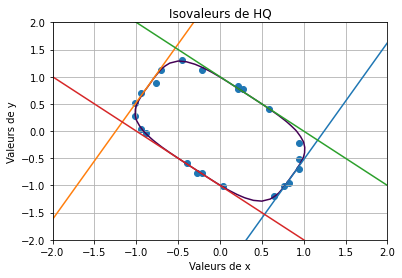

In [34]:
a_min = X0[0]
b_min = X0[1]

droite1 = - a_min/b_min*x1d + 1/b_min
droite2 = - a_min/b_min*x1d - 1/b_min
droite3 =  - x1d + 1 
droite4 =  - x1d - 1

print("Hyper-quadrique avec 2 termes :")
print("1. a, b, c = {}/ {}/ 0.000 - gamma = 4.000".format(a_min, b_min))
print("2. a, b, c = 1.000 / 1.000/ 0.000 - gamme = 4.000")
print("Le minimum a était eteint sous {} itérations".format(n))

plt.contour(x2d,y2d,phi(x2d,y2d,a_min,b_min),[0])

plt.scatter(data[0],data[1])

plt.plot(x1d, droite1)
plt.plot(x1d, droite2)
plt.plot(x1d, droite3)
plt.plot(x1d, droite4)

plt.title('Isovaleurs de HQ')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis([-2, 2, -2, 2]);

Comme prévu théoriquement le minimum a était trouvé trés rapidement (sous 10 itérations).

**Remarque :**
- Pour le meme point de départ que la méthode du gradient, l'algorithme de Newton a divergé. Il a divergé meme pour des points pas trés loin d'un des minimums 
- On comprends ici la complémentarité des deux méthodes pour minimiser une fonction efficacement. En effet, pour etre sur de converger et de minimiser la fonction en un temps minimal il est conseillé de dérouler la méthode du gradient pendant quelques itérations pour se raprocher du minimum puis finalement lancer l'algorithme de Newton pour converger vers la solution plus rapidement.

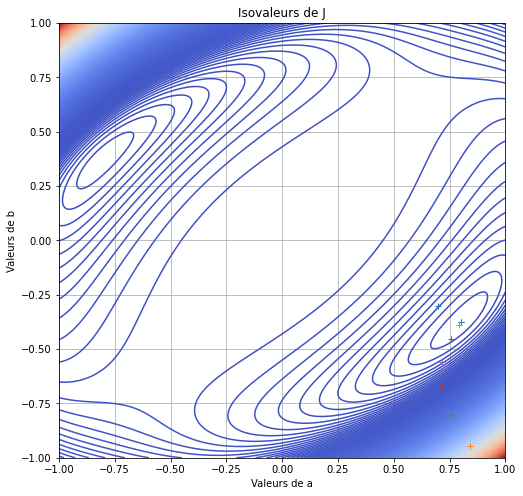

In [35]:
plt.figure(figsize=(8, 8))

plt.contour(a2d,b2d,J(x,y,a2d,b2d,23),levels = 1001,cmap='coolwarm')
for p in point:
    plt.plot(p[0],p[1],'-+')
    
plt.title('Isovaleurs de J')
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.axis([-1, 1, -1, 1])

Sur le graphe des isovaleurs on remarque et confirme que l'algorithme converge bien sur un des minimums et assez rapidement. 